# Analysing Data + Statistics: Solutions

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

### Activity 1

In [2]:
#Get the path to the file we will be using.
path = os.path.join(os.getcwd(), 'datasets', 'who_countries.csv')
#Load the data into the countries_info variable. This results in a DataFrame object.
countries_info = pd.read_csv(path, delimiter = ',')

In [3]:
#Just writing the name of a variable in a cell is enough to print its value
countries_info

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
#Use the DataFrame function describe() to see a summary of the dataset
countries_info.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under- five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


***What is the input data used for calculating these measures?***

The data used are the attributes gathered by the World Health Organisation of several countries between the years 2000-2015



***Do you think this mean can tell us anything? Why? Is this applicable to the other measures?***

This mean is calculated with data of different years and different countries. Because of this, it cannot tell us anything specific. This is applicable to the other measures.


### Activity 2

In [5]:
#The .loc[a] function allows us to get data from a DataFrame that satisfies a condition a
info_15 = countries_info.loc[countries_info['Year'] == 2015]
#In this case, we are getting the data that has 2015 as a value on the 'Year' column

#Use the describe() function again to see the summary of our selected data
info_15.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under- five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Income composition of resources,Schooling
count,183.0,183.000000,183.000000,183.000000,6.000000,183.000000,174.000000,183.000000,181.000000,183.000000,183.000000,2.000000,183.000000,183.000000,154.000000,1.420000e+02,181.000000,181.000000,173.000000,173.000000
mean,2015.0,71.616940,152.863388,23.803279,5.288333,2.383906,82.425287,1502.901639,42.754144,31.612022,83.207650,7.080000,84.633880,0.660656,7185.331746,1.109741e+07,4.534807,4.575691,0.691740,12.927168
std,0.0,8.123706,97.561184,83.683762,4.038115,27.461032,24.008492,7842.394928,20.685702,107.779778,24.245778,1.527351,22.162793,1.344702,11697.508913,2.896230e+07,4.099425,4.180785,0.153412,2.912366
min,2015.0,51.000000,1.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000
25%,2015.0,65.750000,74.000000,0.000000,2.492500,0.000000,78.750000,0.000000,24.300000,0.000000,83.000000,6.540000,83.500000,0.100000,766.008101,2.680710e+05,1.500000,1.500000,0.565000,10.800000
50%,2015.0,73.900000,138.000000,2.000000,5.285000,0.000000,93.000000,17.000000,48.600000,3.000000,93.000000,7.080000,93.000000,0.100000,2916.228918,2.076086e+06,3.500000,3.400000,0.723000,13.100000
75%,2015.0,76.950000,213.000000,17.000000,8.017500,0.000000,97.000000,202.000000,61.400000,21.000000,97.000000,7.620000,97.000000,0.400000,7290.107448,9.940296e+06,6.500000,6.400000,0.798000,15.000000
max,2015.0,88.000000,484.000000,910.000000,10.660000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,8.160000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000


***What does the mean in 'Life expectancy' represent here?***

It represents the average life expectancy in the world in 2015.

***Looking at the percentiles, how many countries do you estimate have a life expectancy of about 77 years or more?***

There are a total of 183 countries, and the 75% percentile is right below 77, so 25% of the total number of countries. This is 45.75, rounded down to 45 countries.

In this activity, we will be working with the GDP and Life expectancy attributes. GDP stands for [Gross Domestic Product](https://www.investopedia.com/terms/g/gdp.asp), and it gives a sense of how rich a country is.

In order to know more about these, we will now plot their [distribution](https://seaborn.pydata.org/generated/seaborn.distplot.html).

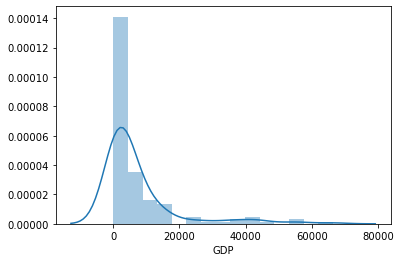

In [6]:
#Plotting the distribution for the GDP
sns.distplot(info_15['GDP'], bins = 15)

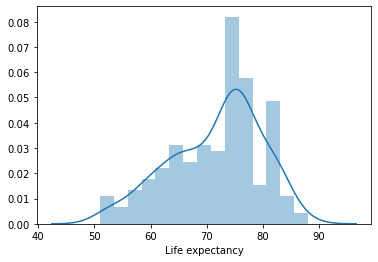

In [7]:
#Write the necessary code for plotting the distribution of the Life expectancy
sns.distplot(info_15['Life expectancy'], bins = 15)

***Seeing the GDP distribution, would you say that most countries have a high GDP? Why?***

No, most countries have a low GDP. This can be seen in the fact that the curve is higher closer to 0.

***Having seen the distribution for both life expectancy and GDP, can you guess from these if there is a correlation?***

No, this is not possible because we do not see the relation between the two, there is no possible way for us to see in this graphs what is the life expectancy and GDP of a specific country. 

Now that we know our data a bit better, let's try to find relationships in it. For doing this, we will be looking at the correlation between attributes by plotting pairs of them. 

Our first step is to take the 2015 data for all the countries' GDP and Life expectancy. Then use the function *plt.plot(x, y, 'o')* to plot the points.

Note: The 'o' at the function arguments is for it to draw circular points. Other markers are available, check the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for these.

If we look at the extracted data, we can see that there are some data points for which we do not have some of the values (they appear as NaN). This means that we need to delete those for our representation.

To drop the NaN values, we use the DataFrame function [.dropna(a)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), where a in this case stands for the subset of the names of the columns we want to act on.

Text(0, 0.5, 'Life expectancy')

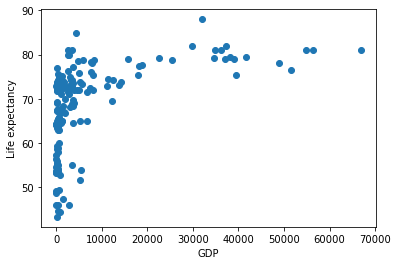

In [8]:
#Complete the function with the names of the columns in which we are deleting NaN values
b = countries_info.loc[countries_info['Year'] == 2005].dropna(subset=['GDP', 'Life expectancy'])
plt.plot(b['GDP'], b['Life expectancy'], 'o')
plt.xlabel("GDP")
plt.ylabel("Life expectancy")

***Remember that each point represents a country. Does the distribution of these match the distribution we plotted earlier?***

Yes, because there are more points (countries) closer to zero than further from it in case of the GDP, and most of them fall between 60 and 80 in case of life expectancy.

***From this plot, can you deduce if there is correlation between GDP and life expectancy?***

It is possible to think there is correlation if you think of logarithmic scales. Otherwise, there is not a clear "straight line" for these points.

There are many points close to 0. This is because some GDPs are very big compared to others. So, in order to represent the data properly and see if there is in fact a correlation, we need to change the scale of the GDP axis. What scale would be the most appropriate to do this? Write the necessary code for representing the data in the new scale.

Look at the documentation for the function .xscale() to find what argument you need to use for your scale.

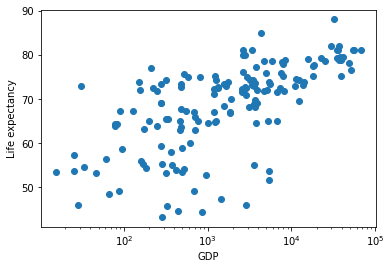

In [9]:
plt.plot(b['GDP'], b['Life expectancy'], 'o')
#Fill in the correct argument
plt.xscale('log')
plt.xlabel("GDP")
plt.ylabel("Life expectancy")
plt.show()

***Do you think there is a correlation here?***

Yes, there is. It would  be possible to draw a straight line through the points

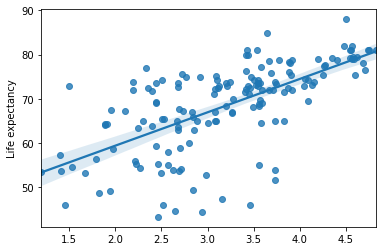

In [10]:
sns.regplot([math.log10(val) for val in b['GDP']], b['Life expectancy'])

Finally, we will now calculate the value of the correlation between both attributes. We will use the NumPy function [corrcoef(x,y)](https://realpython.com/numpy-scipy-pandas-correlation-python/). This function returns a 2x2 matrix with the correlation coefficients between the two arguments (i.e. \[x-x, y-x\], \[x-y, y-y\]).We are interested in the x-y or y-x coefficients.  We will again apply a logarithmic function to our GDP data before passing it into the function.

In [11]:
np.corrcoef([math.log10(val) for val in b['GDP']], b['Life expectancy'])

array([[1.        , 0.64564024],
       [0.64564024, 1.        ]])

***What correlation coefficient did you obtain? Do you think this is high?***

The coefficient obtained is 0.646. This is a fairly high coefficient, but not too much.

### Activity 3

Keeping in mind what we have done until here, take two other attributes that you think might be related and check if there seems to be a correlation. Remember the following:
    
    -Delete the empty values where necessary 
    
    -Label all the plots you make
    
    -Use an appropriate scale when necessary

When you have your final result, make sure that you explain why do you think there is or there is not a correlation.

Year
Year
Life expectancy
Life expectancy
0.9999999999999998


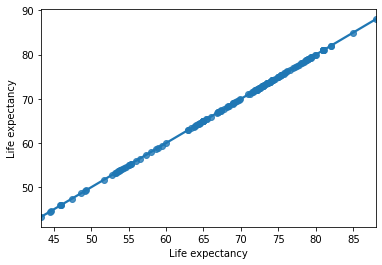

Life expectancy
Adult Mortality
-0.5773860004392332


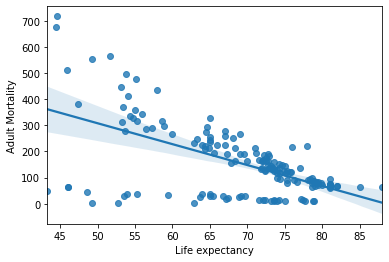

Life expectancy
infant deaths
-0.1767712596868219


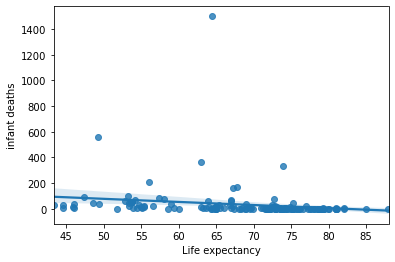

Life expectancy
Alcohol
0.3677994203586289


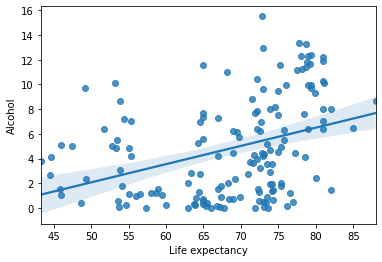

Life expectancy
percentage expenditure
0.6131451175065794


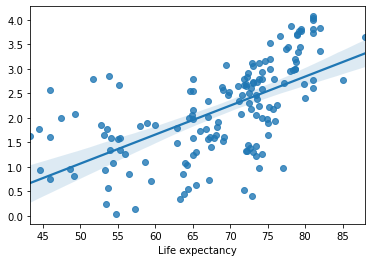

Life expectancy
Hepatitis B
0.19171512110134512


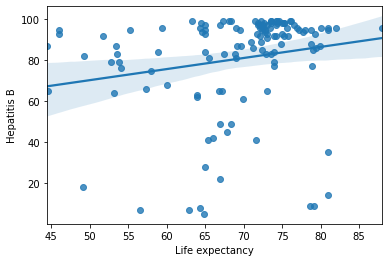

Life expectancy
Measles
-0.09014521063119169


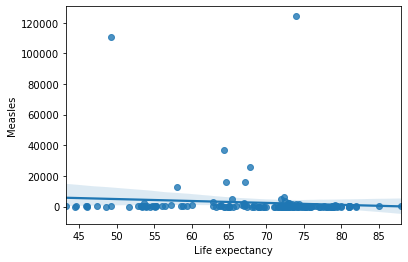

Life expectancy
BMI
0.48801118018354545


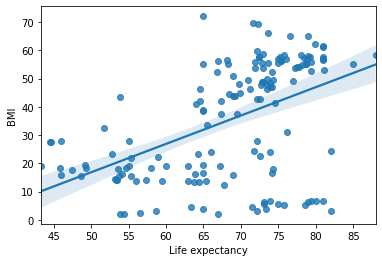

Life expectancy
under- five deaths
-0.20338791526018735


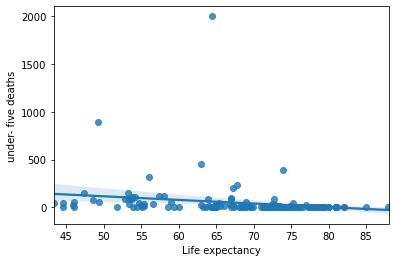

Life expectancy
Polio
0.4114353397634695


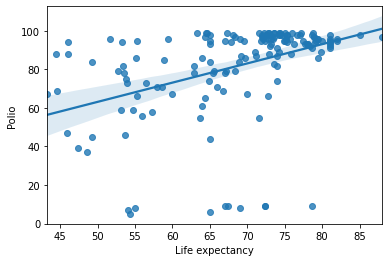

Life expectancy
Total expenditure
0.1196517560378341


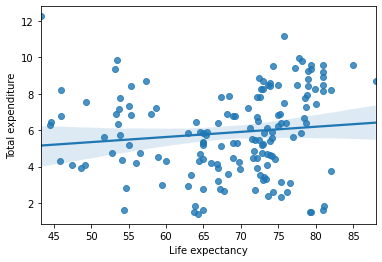

Life expectancy
Diphtheria
0.44116708514595626


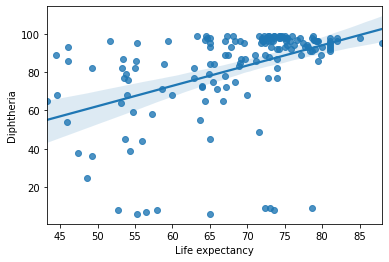

Life expectancy
HIV/AIDS
-0.6152816176574439


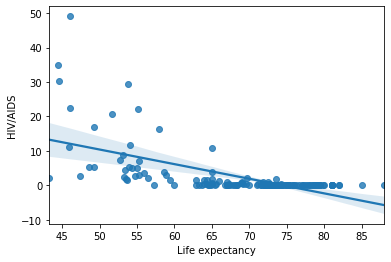

Life expectancy
GDP
0.6456402362929173


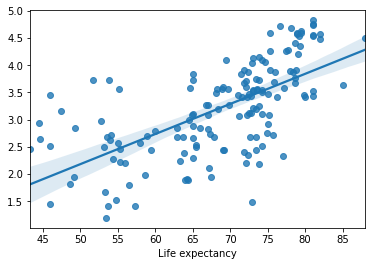

Life expectancy
Population
-0.040931874345374694


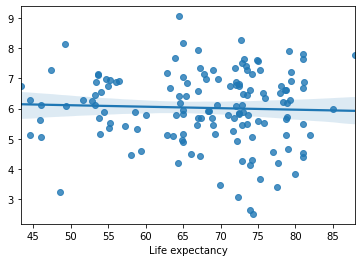

Life expectancy
thinness1-19years
-0.48541429532779445


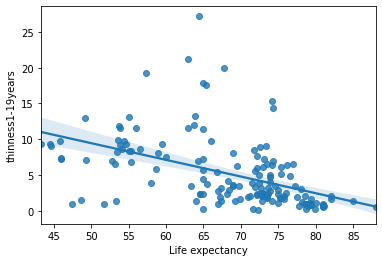

Life expectancy
thinness5-9years
-0.5622125371191572


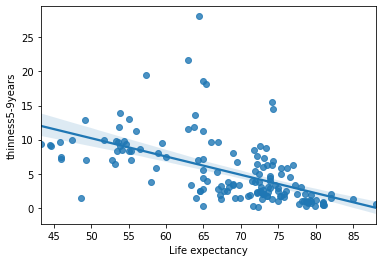

Life expectancy
Income composition of resources
0.6487870760858148


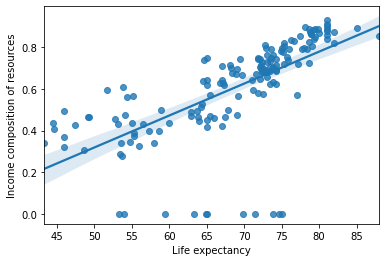

Life expectancy
Schooling
0.7099101060338161


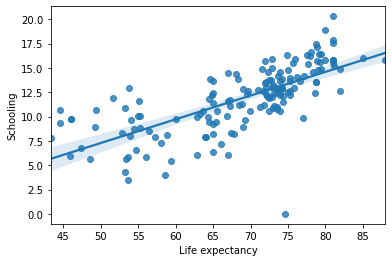

Adult Mortality
Adult Mortality
1.0


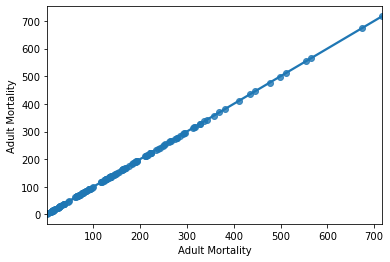

Adult Mortality
infant deaths
0.032429472484444374


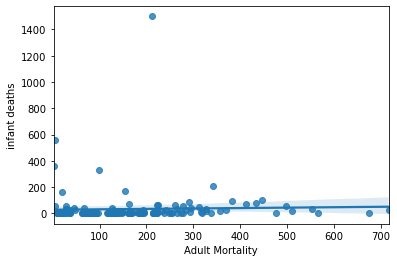

Adult Mortality
Alcohol
-0.1111399792840621


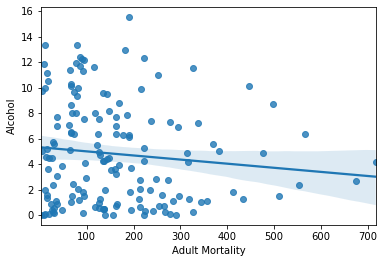

Adult Mortality
percentage expenditure
-0.2918784991201869


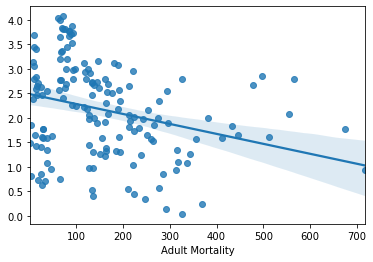

Adult Mortality
Hepatitis B
-0.009937929570989112


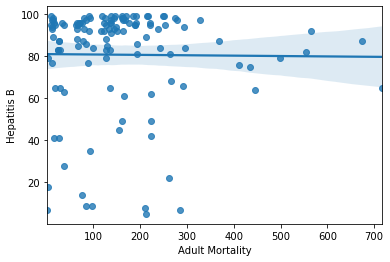

Adult Mortality
Measles
-0.06838863549151977


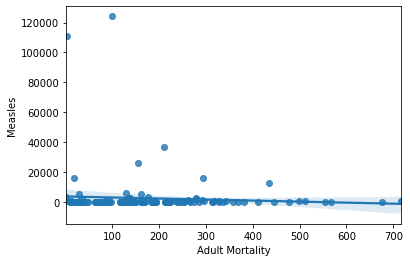

Adult Mortality
BMI
-0.24458669473437467


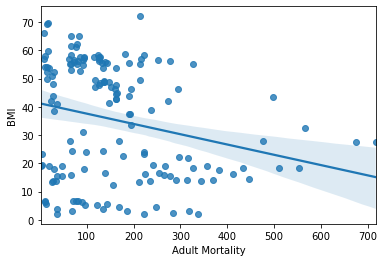

Adult Mortality
under- five deaths
0.039738197959796134


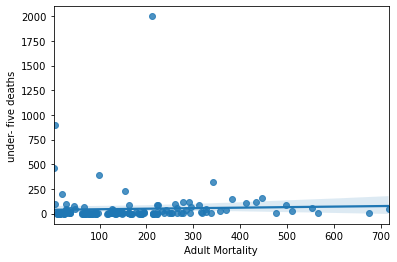

Adult Mortality
Polio
-0.16881301962524015


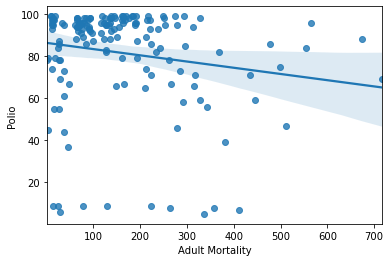

Adult Mortality
Total expenditure
-0.050106864682950475


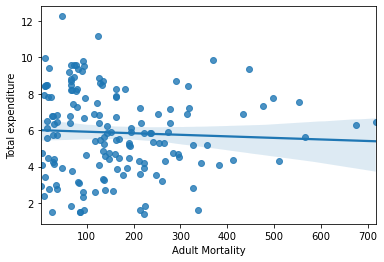

Adult Mortality
Diphtheria
-0.1377889356204488


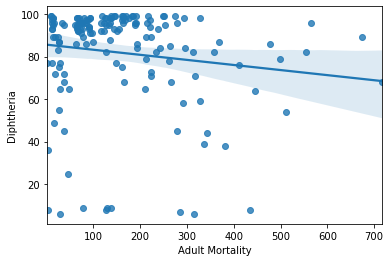

Adult Mortality
HIV/AIDS
0.5082815538616395


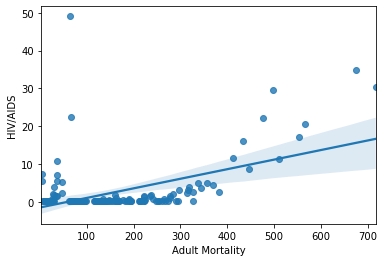

Adult Mortality
GDP
-0.3042125891981421


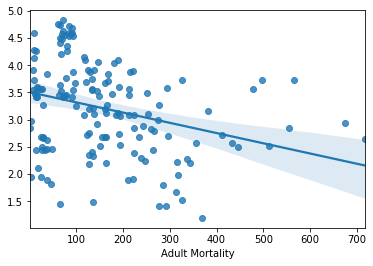

Adult Mortality
Population
0.09154165023011217


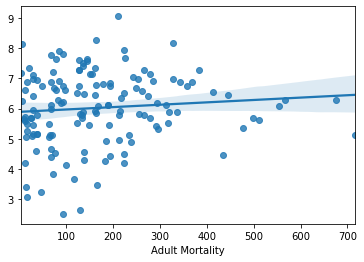

Adult Mortality
thinness1-19years
0.2525914480077853


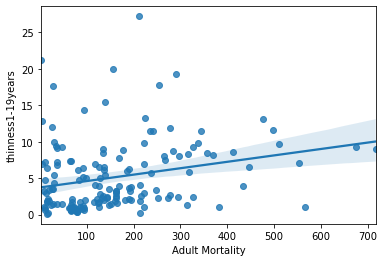

Adult Mortality
thinness5-9years
0.3397765401257455


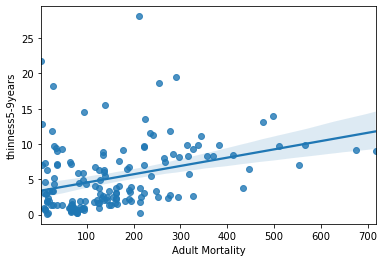

Adult Mortality
Income composition of resources
-0.29577843892829464


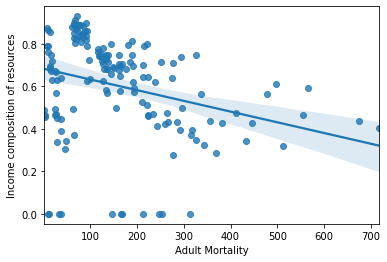

Adult Mortality
Schooling
-0.31462576513008994


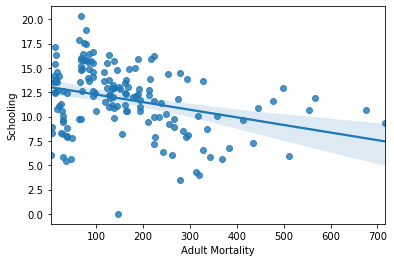

infant deaths
infant deaths
0.9999999999999998


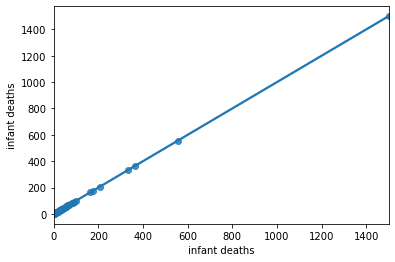

infant deaths
Alcohol
-0.12375089648135076


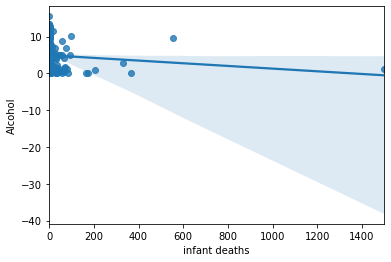

infant deaths
percentage expenditure
-0.25442348574409107


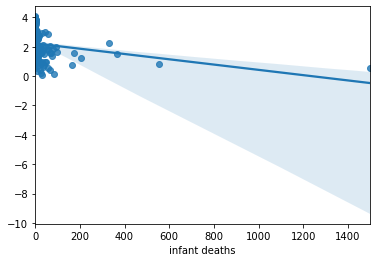

infant deaths
Hepatitis B
-0.4096890513893692


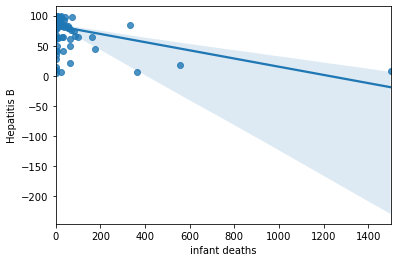

infant deaths
Measles
0.537691082847281


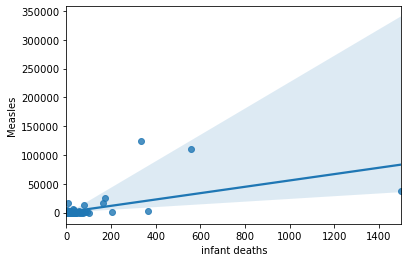

infant deaths
BMI
-0.1944154701292211


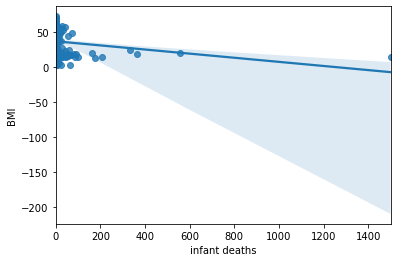

infant deaths
under- five deaths
0.9968588312920127


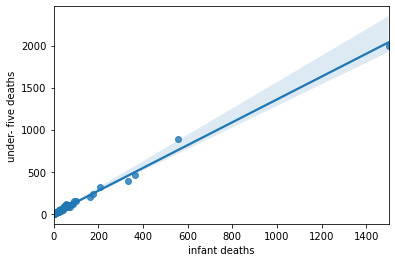

infant deaths
Polio
-0.15164335617132663


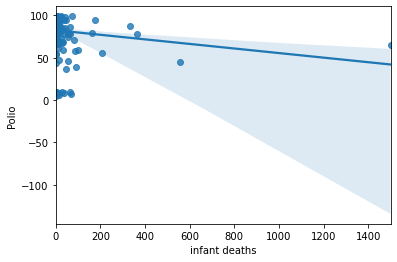

infant deaths
Total expenditure
-0.12552122127104445


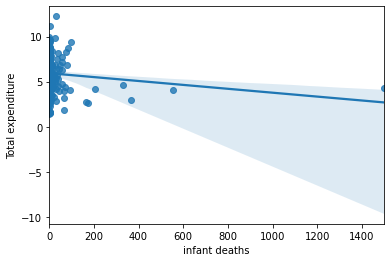

infant deaths
Diphtheria
-0.17281578656646734


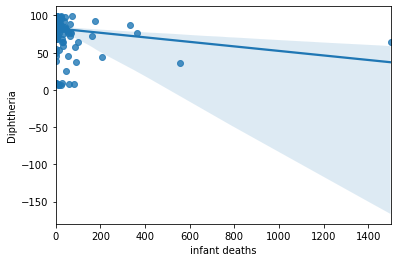

infant deaths
HIV/AIDS
0.006826900669681697


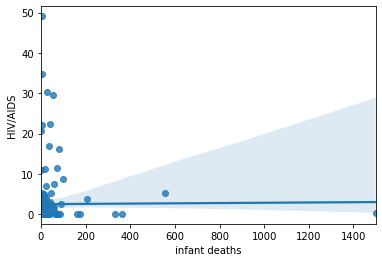

infant deaths
GDP
-0.2466239601437335


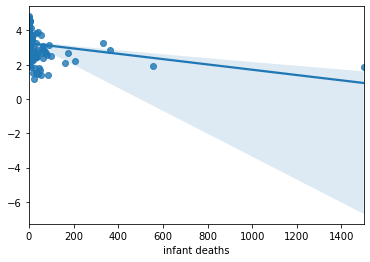

infant deaths
Population
0.2823144581515405


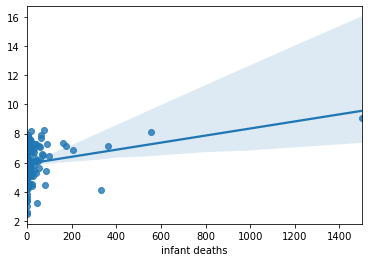

infant deaths
thinness1-19years
0.5027177417564549


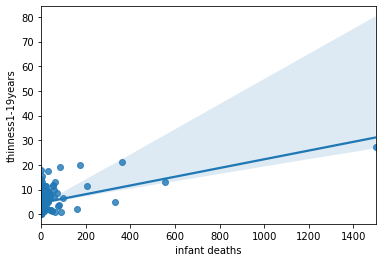

infant deaths
thinness5-9years
0.5019431862251797


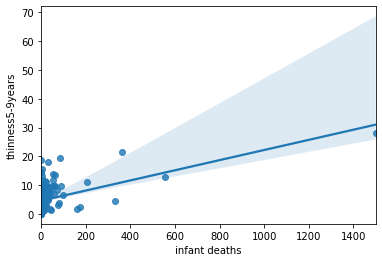

infant deaths
Income composition of resources
-0.11040174977111272


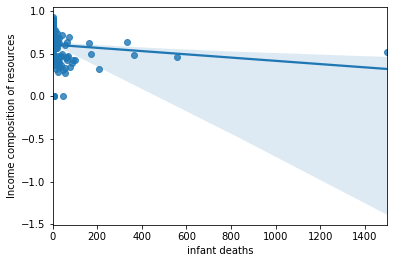

infant deaths
Schooling
-0.20566598190080554


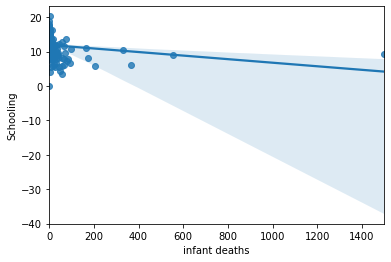

Alcohol
Alcohol
1.0


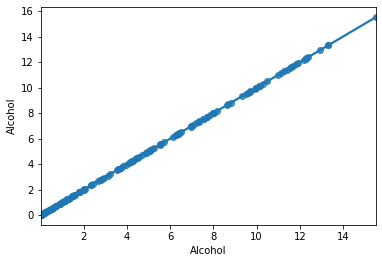

Alcohol
percentage expenditure
0.502901975985334


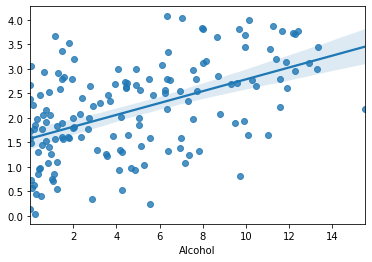

Alcohol
Hepatitis B
0.11996698996657633


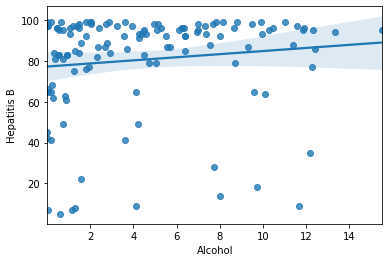

Alcohol
Measles
-0.015348865084776694


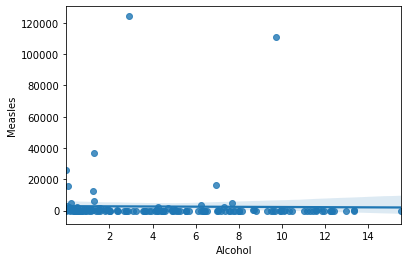

Alcohol
BMI
0.34965822893606296


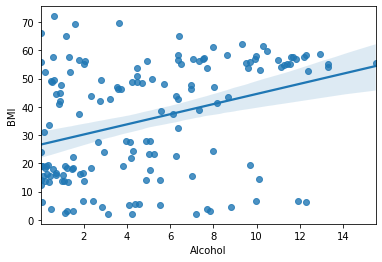

Alcohol
under- five deaths
-0.11822466820159093


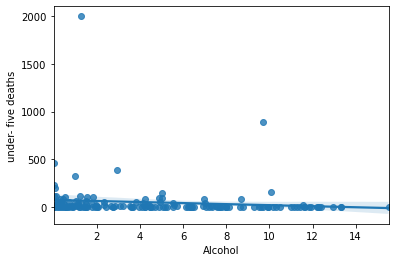

Alcohol
Polio
0.2448651592166888


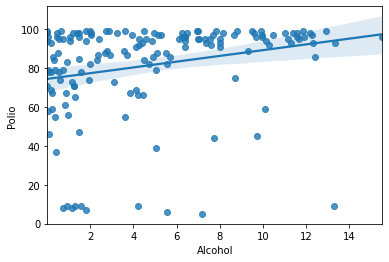

Alcohol
Total expenditure
0.3277921375778849


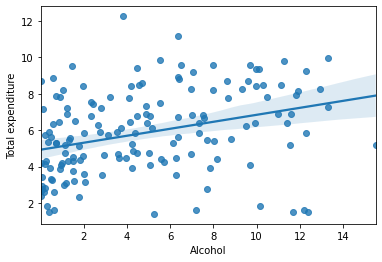

Alcohol
Diphtheria
0.2262604403821293


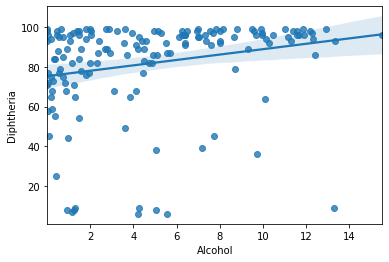

Alcohol
HIV/AIDS
-0.046707509195386555


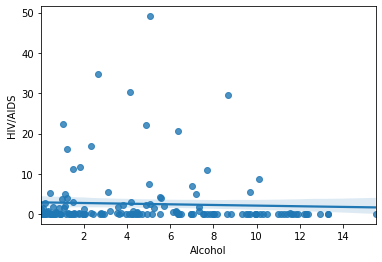

Alcohol
GDP
0.4858967807116921


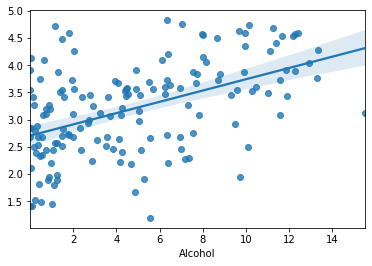

Alcohol
Population
0.08125406437627278


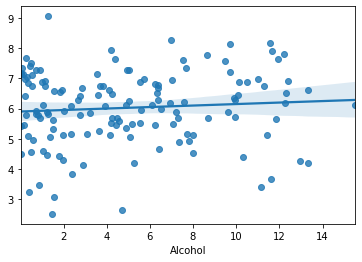

Alcohol
thinness1-19years
-0.4722413707783098


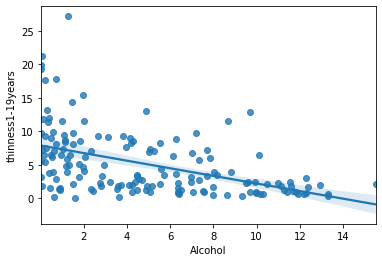

Alcohol
thinness5-9years
-0.4356566628753286


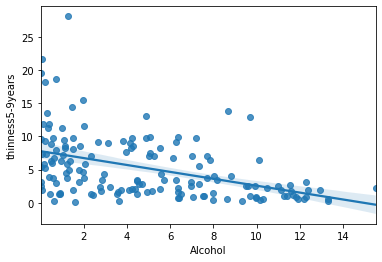

Alcohol
Income composition of resources
0.4597316671131681


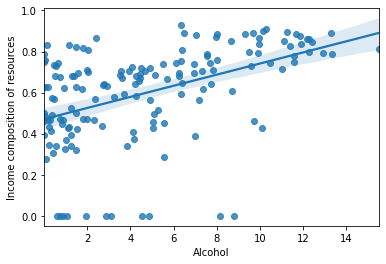

Alcohol
Schooling
0.5671889346346733


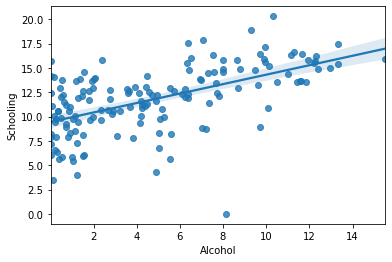

percentage expenditure
percentage expenditure
0.9999999999999999


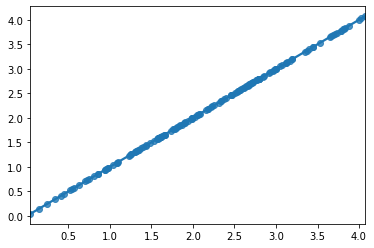

percentage expenditure
Hepatitis B
0.13043061385592916


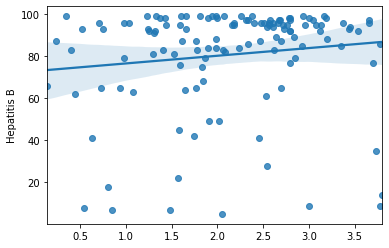

percentage expenditure
Measles
-0.12362952162547902


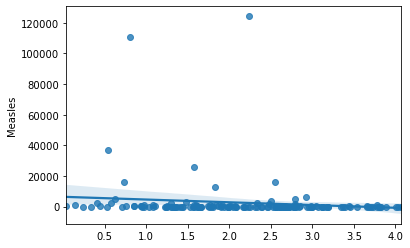

percentage expenditure
BMI
0.4506578571412529


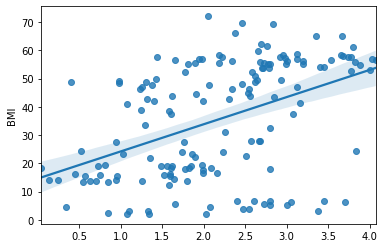

percentage expenditure
under- five deaths
-0.2654087434690351


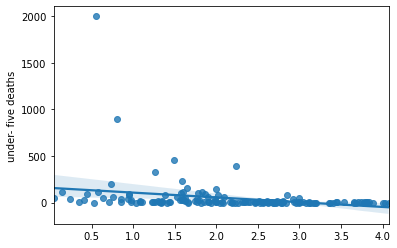

percentage expenditure
Polio
0.289920732492489


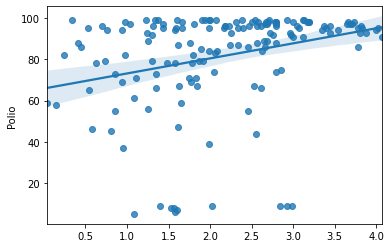

percentage expenditure
Total expenditure
0.1951539281934933


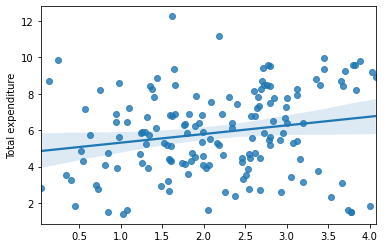

percentage expenditure
Diphtheria
0.3331626201890368


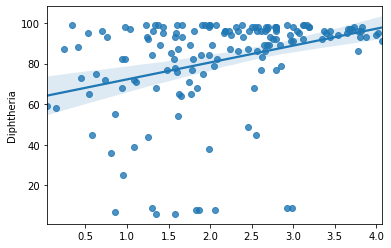

percentage expenditure
HIV/AIDS
-0.11503584163614368


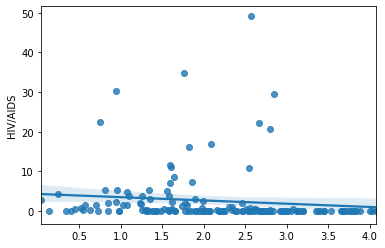

percentage expenditure
GDP
0.9481905860796541


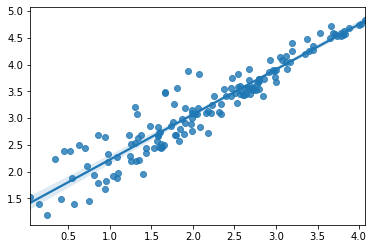

percentage expenditure
Population
-0.0745547310212519


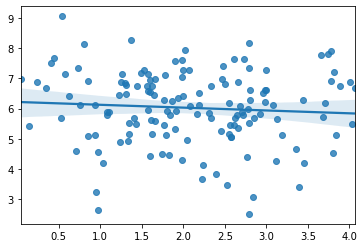

percentage expenditure
thinness1-19years
-0.4814272729411012


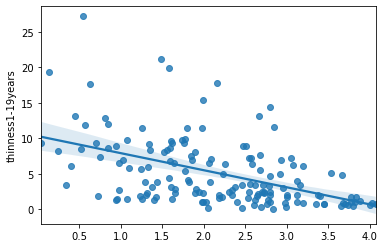

percentage expenditure
thinness5-9years
-0.48506707719203435


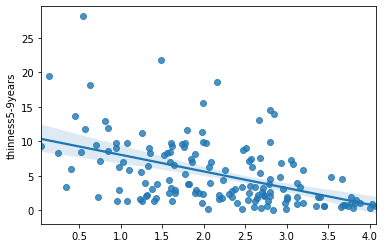

percentage expenditure
Income composition of resources
0.5882134810907019


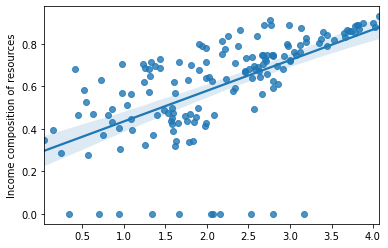

percentage expenditure
Schooling
0.6515311449240655


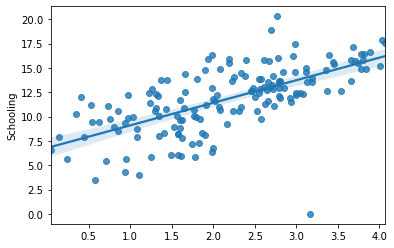

Hepatitis B
Hepatitis B
1.0


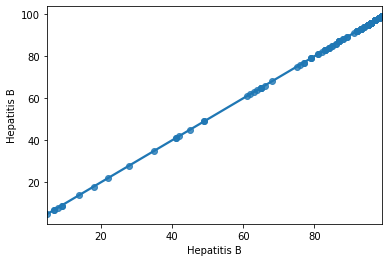

Hepatitis B
Measles
-0.22477810712514995


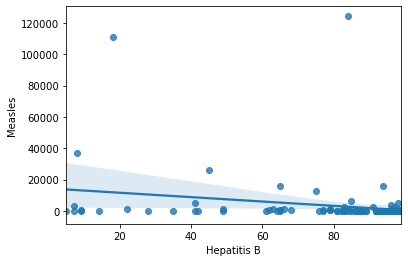

Hepatitis B
BMI
0.15456224847284789


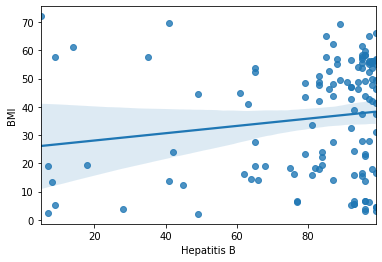

Hepatitis B
under- five deaths
-0.4177536943559951


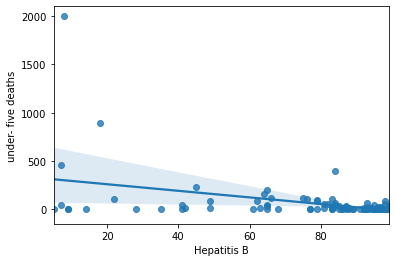

Hepatitis B
Polio
0.3721440011462813


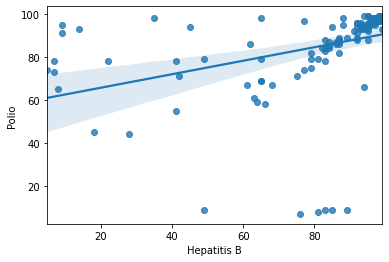

Hepatitis B
Total expenditure
0.20434708574175645


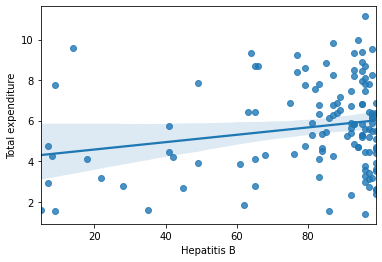

Hepatitis B
Diphtheria
0.4195695867063809


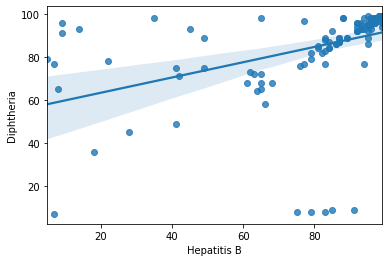

Hepatitis B
HIV/AIDS
-0.008915637413765509


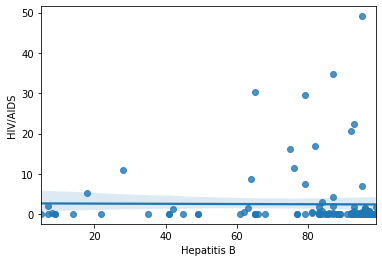

Hepatitis B
GDP
0.1493128611168619


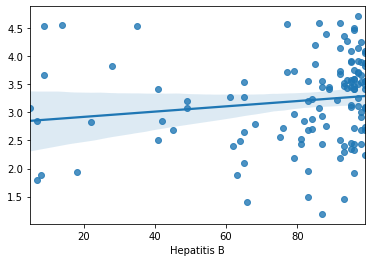

Hepatitis B
Population
-0.16033034091204168


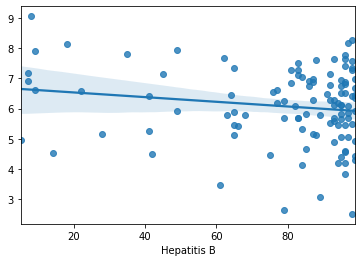

Hepatitis B
thinness1-19years
-0.28836828899010075


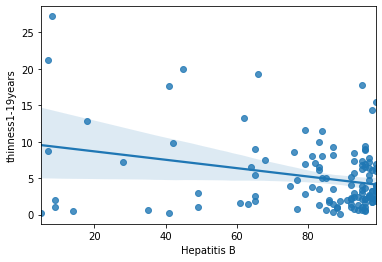

Hepatitis B
thinness5-9years
-0.2687171391940733


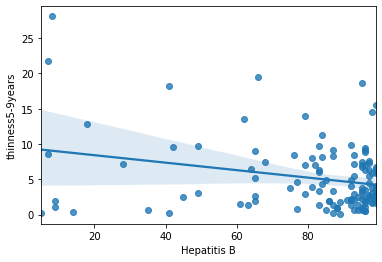

Hepatitis B
Income composition of resources
0.17376012295773383


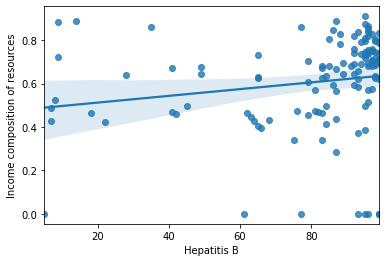

Hepatitis B
Schooling
0.24372894872567102


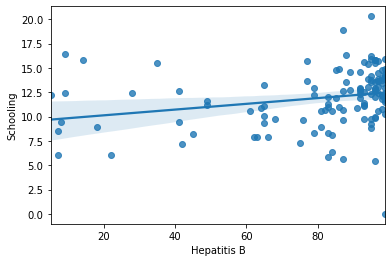

Measles
Measles
1.0


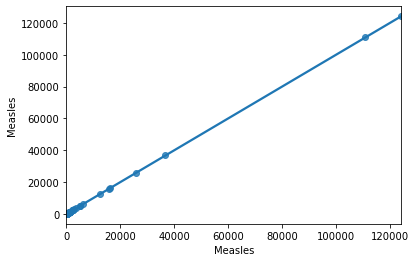

Measles
BMI
-0.11326897532962621


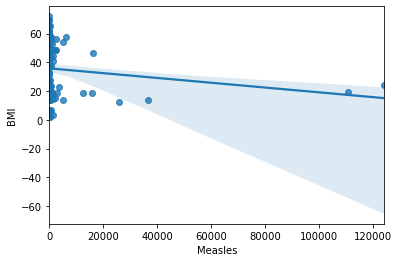

Measles
under- five deaths
0.5505637290444214


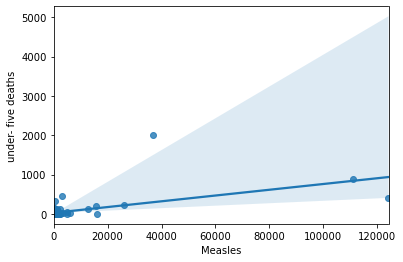

Measles
Polio
-0.07792798727680209


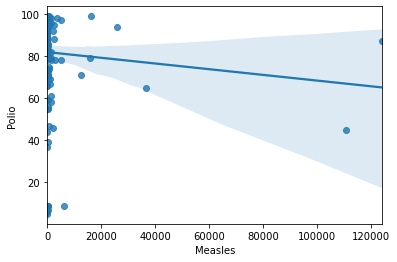

Measles
Total expenditure
-0.11401574879811588


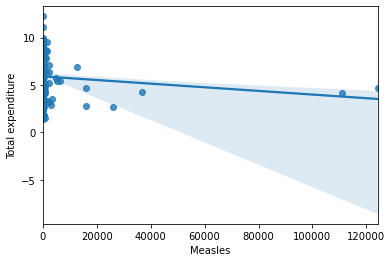

Measles
Diphtheria
-0.12387246269860559


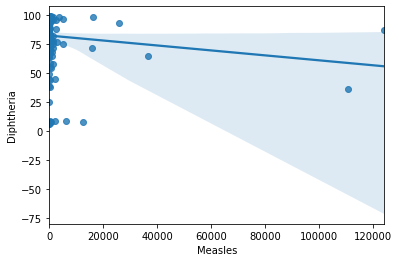

Measles
HIV/AIDS
-0.006848803709352122


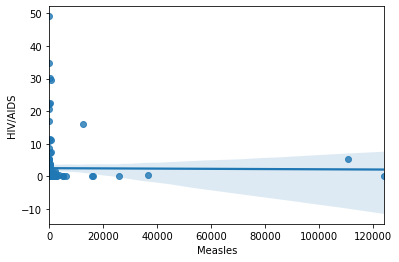

Measles
GDP
-0.12477111649821929


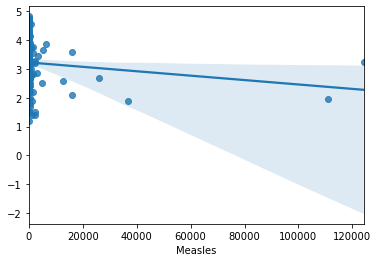

Measles
Population
0.06449212587784967


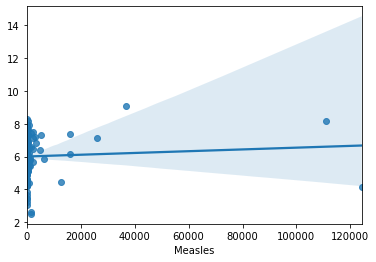

Measles
thinness1-19years
0.20502714912841158


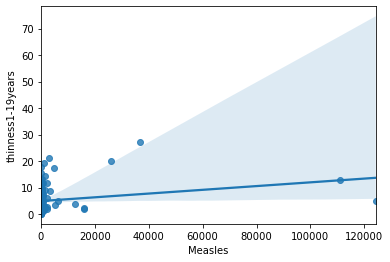

Measles
thinness5-9years
0.15457930365436964


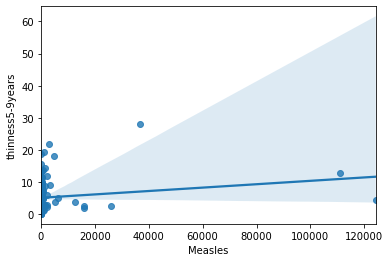

Measles
Income composition of resources
-0.0366973362265107


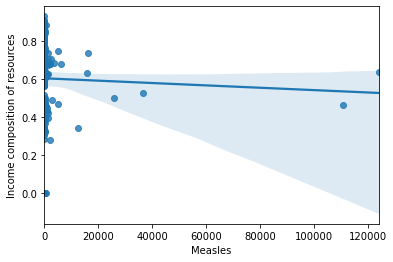

Measles
Schooling
-0.10232848683100672


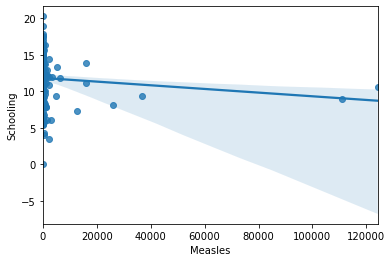

BMI
BMI
1.0


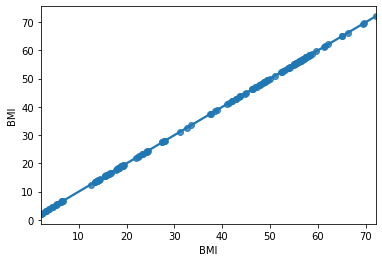

BMI
under- five deaths
-0.20453891645500946


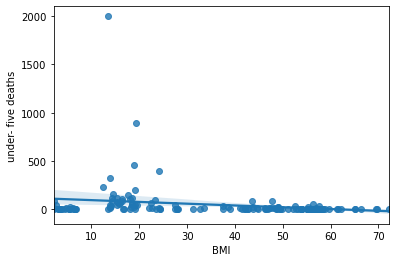

BMI
Polio
0.2361582472578713


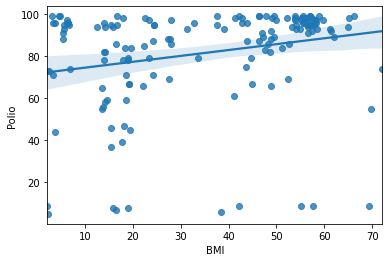

BMI
Total expenditure
0.13057925382707458


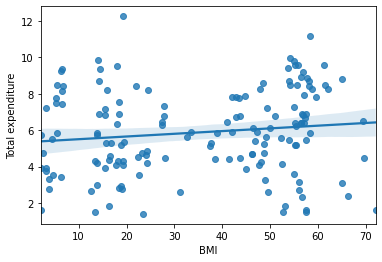

BMI
Diphtheria
0.23070682881537877


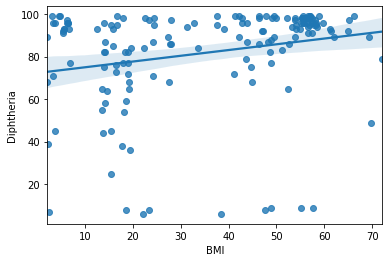

BMI
HIV/AIDS
-0.20087892469610202


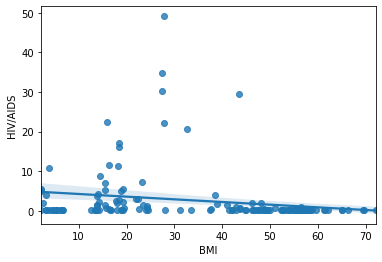

BMI
GDP
0.42529590485377694


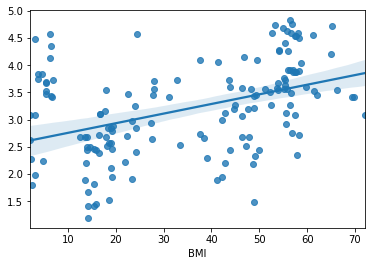

BMI
Population
-0.08487899494837586


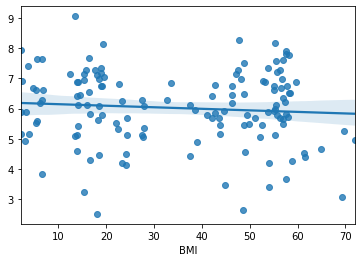

BMI
thinness1-19years
-0.5137774198353663


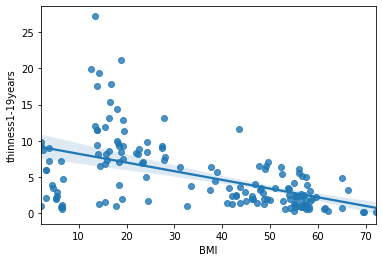

BMI
thinness5-9years
-0.537041964803495


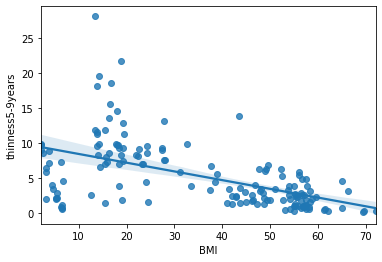

BMI
Income composition of resources
0.5292449980823979


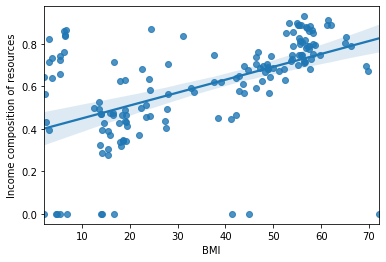

BMI
Schooling
0.5490826848795788


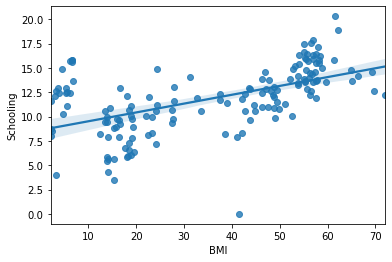

under- five deaths
under- five deaths
0.9999999999999999


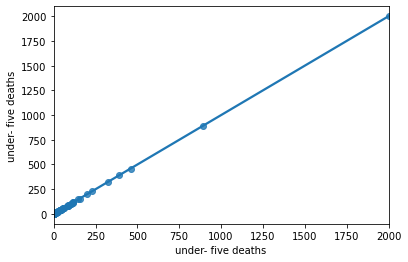

under- five deaths
Polio
-0.16804405372786843


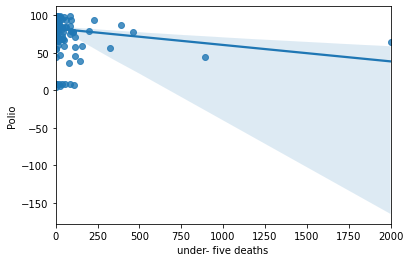

under- five deaths
Total expenditure
-0.1236086391995851


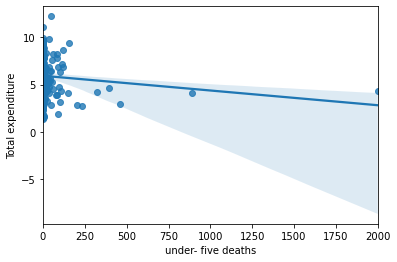

under- five deaths
Diphtheria
-0.1932219283811446


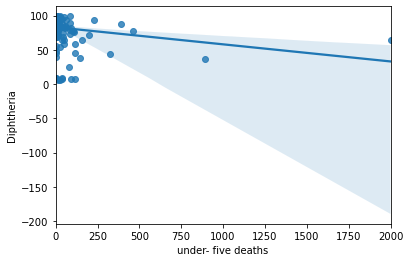

under- five deaths
HIV/AIDS
0.017792853590836006


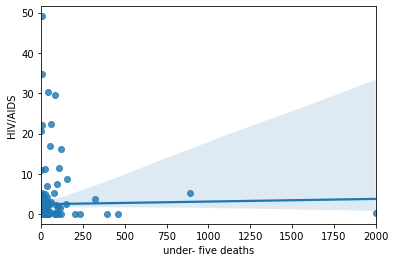

under- five deaths
GDP
-0.261291156764953


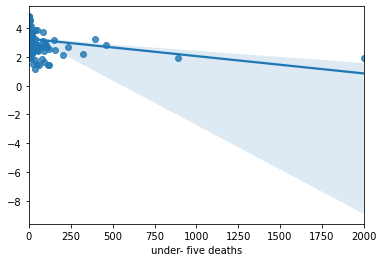

under- five deaths
Population
0.28988244040390126


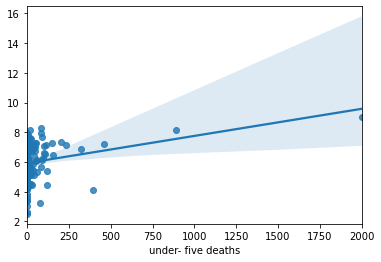

under- five deaths
thinness1-19years
0.5059654186419863


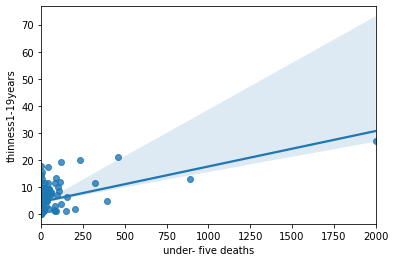

under- five deaths
thinness5-9years
0.508376899271102


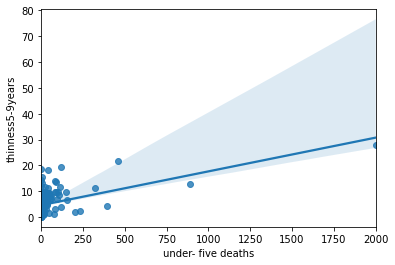

under- five deaths
Income composition of resources
-0.1254767709225595


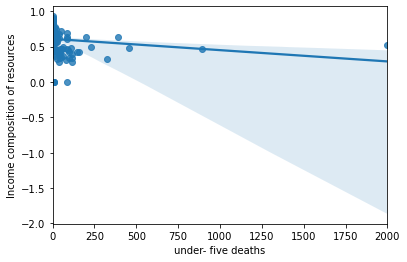

under- five deaths
Schooling
-0.22218462236556968


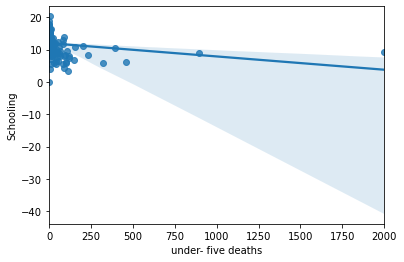

Polio
Polio
1.0


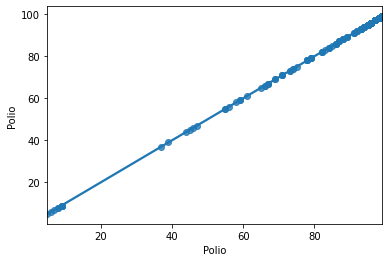

Polio
Total expenditure
0.14015709037711133


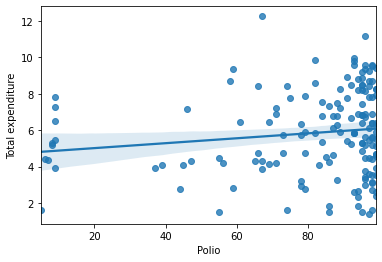

Polio
Diphtheria
0.617926748283606


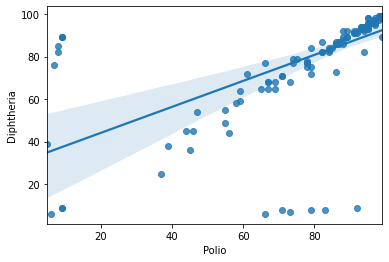

Polio
HIV/AIDS
-0.12117278008775044


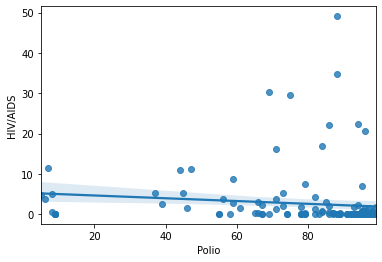

Polio
GDP
0.3488380199063578


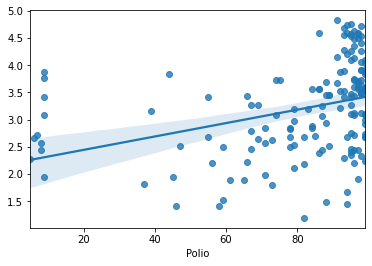

Polio
Population
-0.012743219102769614


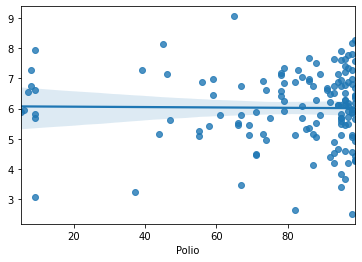

Polio
thinness1-19years
-0.17232938248301644


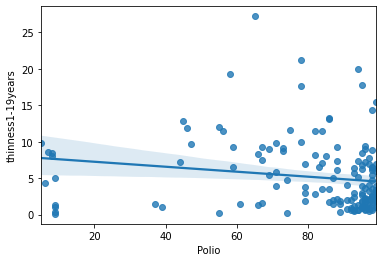

Polio
thinness5-9years
-0.22920499912649295


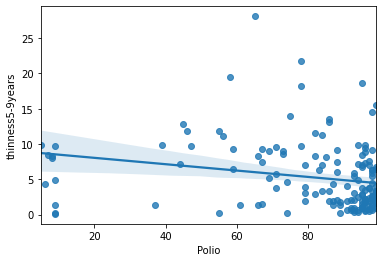

Polio
Income composition of resources
0.27866275902733556


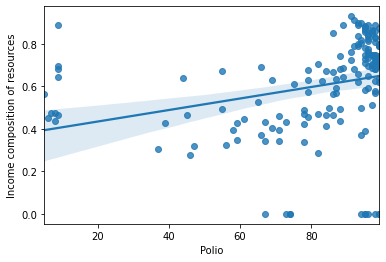

Polio
Schooling
0.36070502055838644


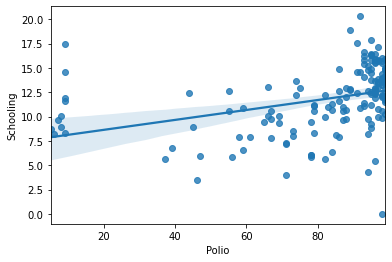

Total expenditure
Total expenditure
1.0


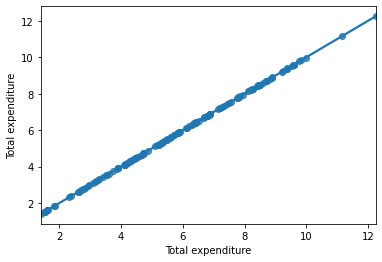

Total expenditure
Diphtheria
0.13102681976285077


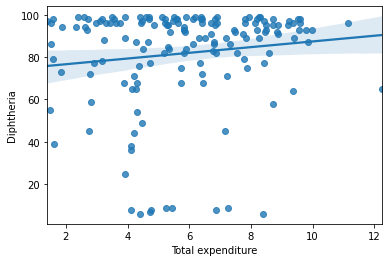

Total expenditure
HIV/AIDS
0.07037441332930693


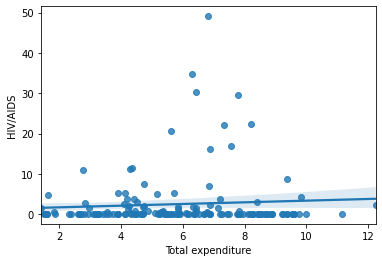

Total expenditure
GDP
0.0796770357677335


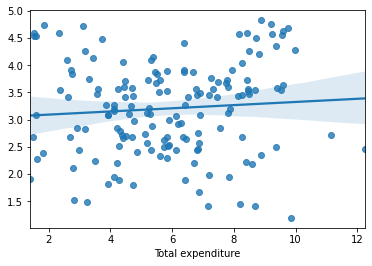

Total expenditure
Population
-0.1568588545034488


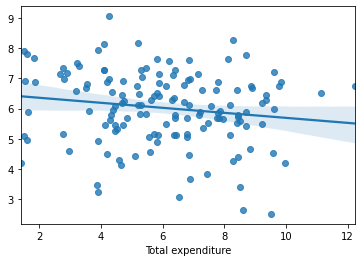

Total expenditure
thinness1-19years
-0.24708131783201706


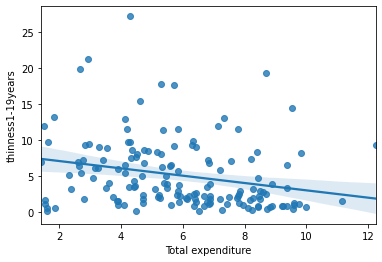

Total expenditure
thinness5-9years
-0.22907571430008247


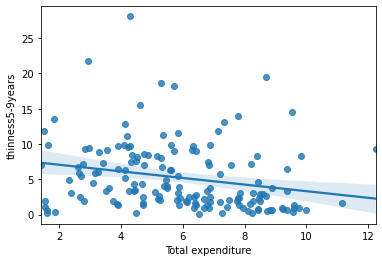

Total expenditure
Income composition of resources
0.15119022508072183


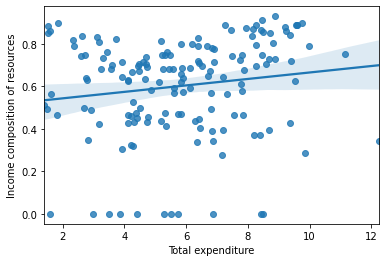

Total expenditure
Schooling
0.2653512763072931


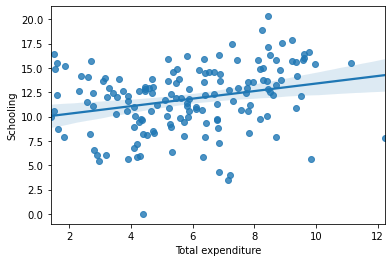

Diphtheria
Diphtheria
0.9999999999999999


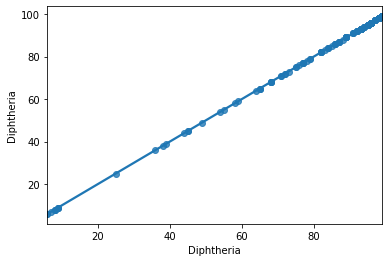

Diphtheria
HIV/AIDS
-0.1481171179196848


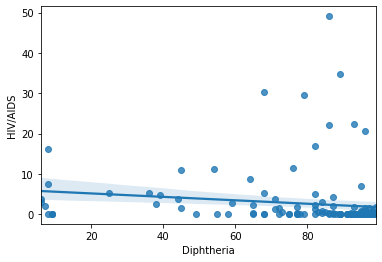

Diphtheria
GDP
0.35028243479279214


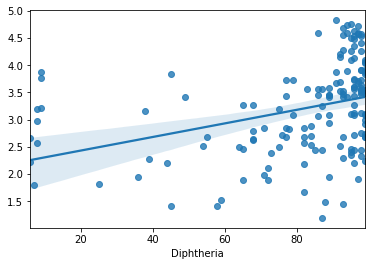

Diphtheria
Population
-0.019295309089623684


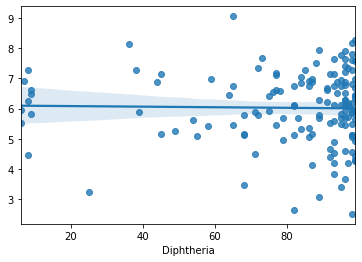

Diphtheria
thinness1-19years
-0.21649675990413006


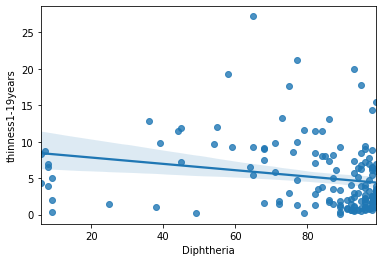

Diphtheria
thinness5-9years
-0.23979283635176507


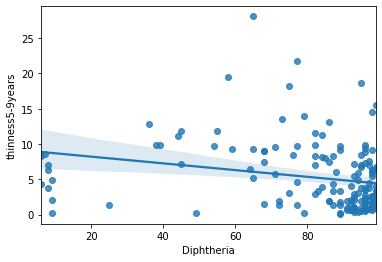

Diphtheria
Income composition of resources
0.30793864557124917


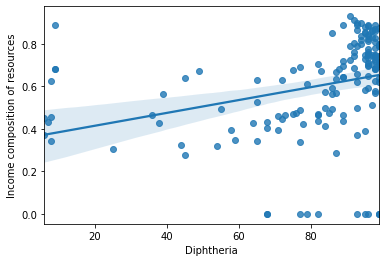

Diphtheria
Schooling
0.41125853525796996


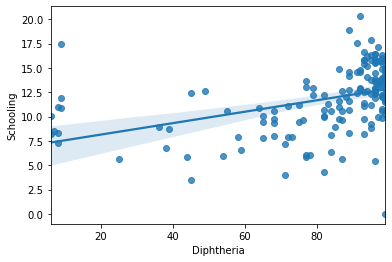

HIV/AIDS
HIV/AIDS
0.9999999999999999


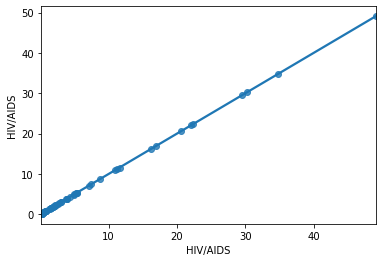

HIV/AIDS
GDP
-0.1417692784703894


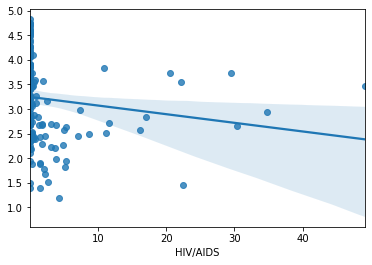

HIV/AIDS
Population
-0.07993255549265844


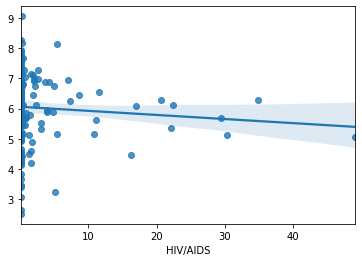

HIV/AIDS
thinness1-19years
0.20805189389945347


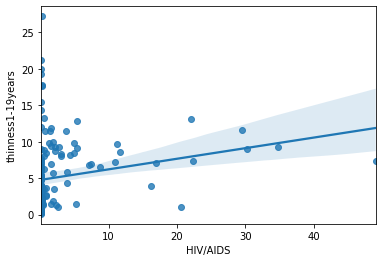

HIV/AIDS
thinness5-9years
0.2578213663248544


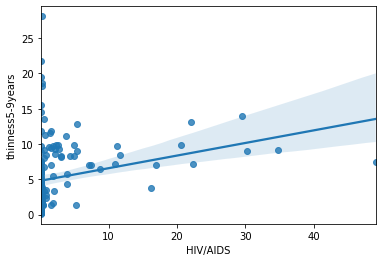

HIV/AIDS
Income composition of resources
-0.21992649110566126


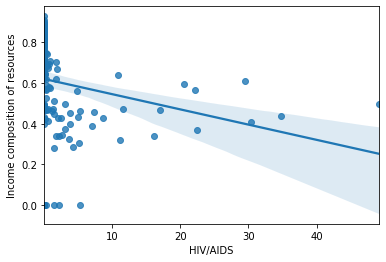

HIV/AIDS
Schooling
-0.2135494516245039


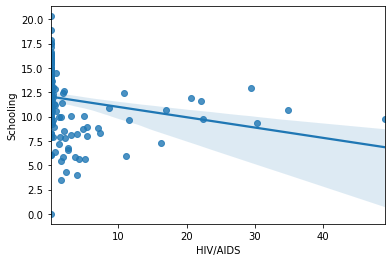

GDP
GDP
1.0


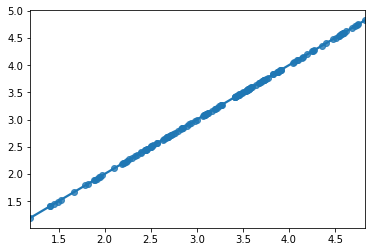

GDP
Population
-0.0527183296999567


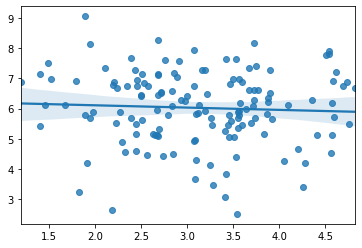

GDP
thinness1-19years
-0.43295487756280104


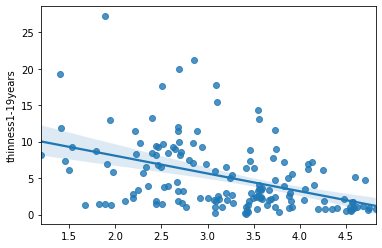

GDP
thinness5-9years
-0.439777850036392


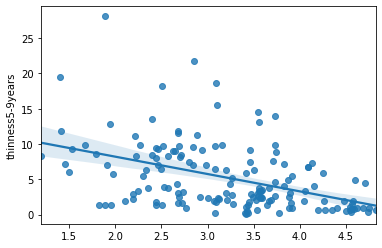

GDP
Income composition of resources
0.577907660284815


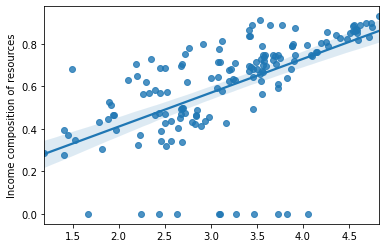

GDP
Schooling
0.674853973253725


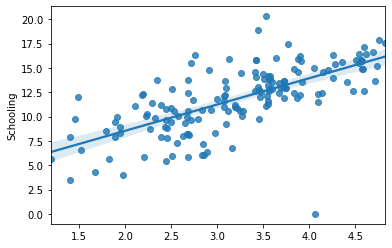

Population
Population
0.9999999999999998


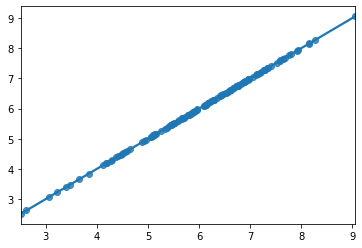

Population
thinness1-19years
0.10415598912847665


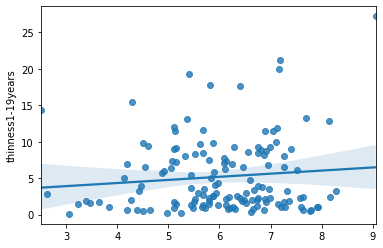

Population
thinness5-9years
0.1234406637061364


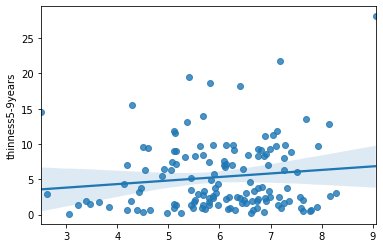

Population
Income composition of resources
0.05738609920138554


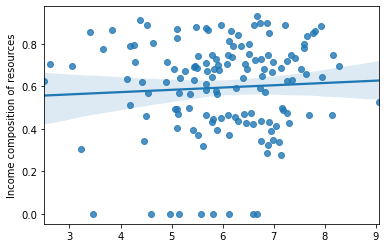

Population
Schooling
-0.03644947872485226


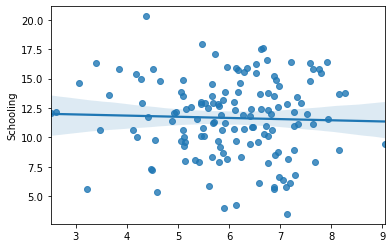

thinness1-19years
thinness1-19years
0.9999999999999998


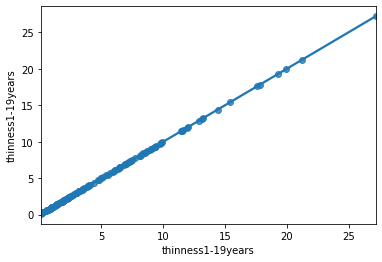

thinness1-19years
thinness5-9years
0.911214254817197


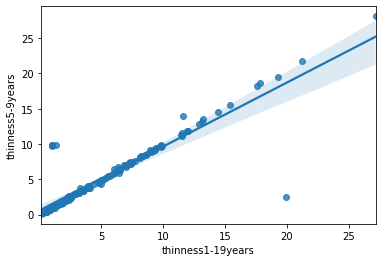

thinness1-19years
Income composition of resources
-0.40070614939391286


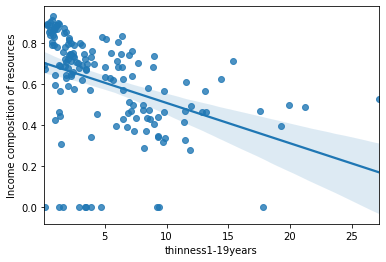

thinness1-19years
Schooling
-0.5216811305027361


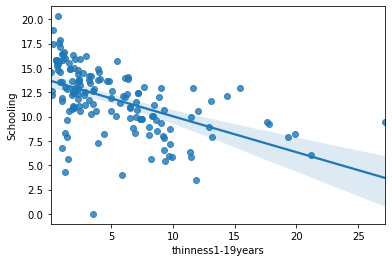

thinness5-9years
thinness5-9years
1.0


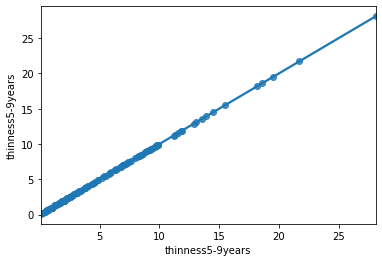

thinness5-9years
Income composition of resources
-0.4350518890656437


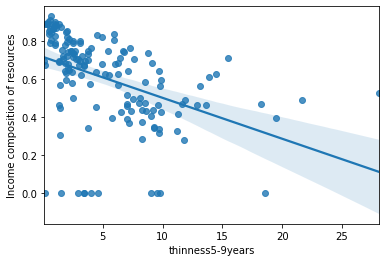

thinness5-9years
Schooling
-0.5461592383981315


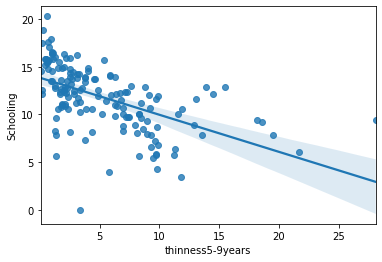

Income composition of resources
Income composition of resources
0.9999999999999999


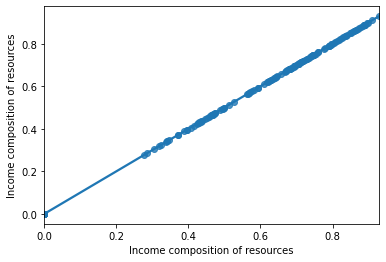

Income composition of resources
Schooling
0.7458584560892811


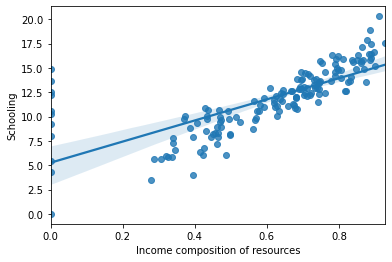

Schooling
Schooling
0.9999999999999999


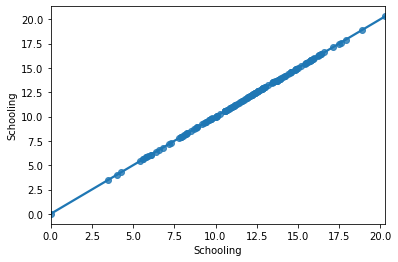

In [22]:
#I am including here a cell that outputs all the possible plots and their correlation for the
#2015 data.
#Take the columns with numerical values (ignore parts like th name of the country)
cols = list(b.select_dtypes('number').columns)

#Loop through all the columns
for i in range(len(cols)):
    for j in range(i,len(cols)):
        #Get the clean data for both columns. Otherwise, correlation and plots are not correct
        clean = b.dropna(subset = [cols[i],cols[j]])
        print(cols[i])
        print(cols[j])
        #Ignore all the "year" plots, as the year is the same for all the countries
        if(cols[i]=='Year' ):
            break
        #If columns need to apply log10, do so
        if(cols[i] == 'GDP' or cols[i] == 'Population' or cols[i] == 'percentage expenditure'):
            #In case both columns need log10 to be applied
            if(cols[j] == 'GDP' or cols[j]=='Population' or cols[j] == 'percentage expenditure'):
                sns.regplot([math.log10(val) for val in clean[cols[i]]], [math.log10(val) for val in clean[cols[j]]])
                print(np.corrcoef([math.log10(val) for val in clean[cols[i]]],[math.log10(val) for val in clean[cols[j]]])[0,1])
            else:
                sns.regplot([math.log10(val) for val in clean[cols[i]]], clean[cols[j]])
                print(np.corrcoef([math.log10(val) for val in clean[cols[i]]], clean[cols[j]])[0,1])
        elif(cols[j] == 'GDP' or cols[j]=='Population' or cols[j] == 'percentage expenditure'):
            sns.regplot(clean[cols[i]], [math.log10(val) for val in clean[cols[j]]])
            print(np.corrcoef(clean[cols[i]],[math.log10(val) for val in clean[cols[j]]])[0,1])
        
        else:
            sns.regplot(clean[cols[i]], clean[cols[j]])
            print(np.corrcoef(clean[cols[i]], clean[cols[j]])[0,1])
        plt.show()